In [104]:
import numpy as np
import os, sys, librosa
from librosa import display
from scipy import signal
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import IPython.display as ipd
import pandas as pd
from numba import jit
from IPython.display import Audio 
import IPython

import soundfile
import cdpam

from scipy.stats import pearsonr, spearmanr

import scipy.spatial as sp

import shutil
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import numpy as np

import librosa
from IPython.display import Audio, display
from PIL import Image
import matplotlib.pyplot as plt
import scipy.stats as stats
import collections as c

from torch.nn.modules.module import _addindent

import copy
import os
import math

import soundfile as sf
from matplotlib.pyplot import figure

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Morph

In [142]:
morphgan_audio='/Users/purnimakamath/appdir/Github/ieee-tx-on-mm/data/water-wind/morphgan/audio/morph'
onehot_audio='/Users/purnimakamath/appdir/Github/ieee-tx-on-mm/data/water-wind/onehot/audio/morph'
mix_audio='/Users/purnimakamath/appdir/Github/ieee-tx-on-mm/data/water-wind/mix/audio/morph'
morph2_audio='/Users/purnimakamath/appdir/Github/ieee-tx-on-mm/data/water-wind/morph2/audio/morph'

[_ for _ in os.listdir(mix_audio) if _ !='.DS_Store']

['9', '0', '7', '6', '1', '10', '8', '4', '3', '2', '5']

In [108]:
def create_images(src_audio, dest, selected_folders, is_gan=True):
    example_dirs = [_ for _ in os.listdir(src_audio) if _ !='.DS_Store' and _ in selected_folders]
    for example_dir in example_dirs:
        #print(example_dir)
        if is_gan:
            example_loc_path = os.path.join(src_audio, example_dir, 'one_z_pitch_sweep')
        else:
            example_loc_path = os.path.join(src_audio, example_dir)
            
        example_loc = os.listdir(example_loc_path)
        example_loc = [_ for _ in os.listdir(example_loc_path) if '.wav' in _]
        if is_gan:
            example_loc.sort(key=lambda x:int(x.split('_')[3].split('.')[0]))
        else:
            example_loc.sort(key=lambda x:float(x.split('_')[1].split('.wav')[0]))
        
        for ind, example in enumerate(example_loc):
            example_audio_file = os.path.join(example_loc_path,example)
            dest_dir = os.path.join(dest, example_dir.replace(' ','-').replace(':','-'))
            os.makedirs(dest_dir, exist_ok=True)
            #shutil.copy(example_audio_file,  os.path.join(dest_dir,str(ind)+'.wav'))
            
            y, sr = librosa.load(example_audio_file, sr=16000)
            y=y[:int(1.5*16000)]
            soundfile.write(os.path.join(dest_dir,str(ind)+'.wav'),y,  samplerate=16000)
            
            fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,5))
            D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
            img = librosa.display.specshow(D, y_axis='log', x_axis='time',
                                           sr=sr, ax=ax)
            plt.savefig(os.path.join(dest_dir,str(ind)+'.png'))

In [163]:
row_template = "<div class='row text-wrap text-center'>\
                {row_data}\
                </div>"
first_col_template = "<div class='col-1 border text-wrap text-center'>\
                Sample {sample_num}\
                </div>"
col_template = "<div class='col-1 border text-wrap text-center'>\
                <img width='100%' src='{img_loc}' /><br />\
                <audio style='width:100%' controls>\
                    <source src='{audio_loc}' type='audio/wav' />\
                </audio>\
                </div>"

def create_html_content(content_type, resources_dir):
    resources = os.listdir(resources_dir)
    all_rows = ''
    for ind, resource in enumerate(resources):
        row_data = ''
        #print(resource)
        example_locs = [_ for _ in os.listdir(os.path.join(resources_dir, resource)) if '.wav' in _]
        example_locs.sort(key=lambda x:int(x.split('.')[0]))
        
        row_data += first_col_template.format(sample_num=ind+1)
        
        for example_loc in example_locs:
            example_dir = os.path.join(resources_dir, resource, example_loc)
            #print(example_dir)
        
            row_data += col_template.format(audio_loc=example_dir, img_loc=example_dir.replace('.wav','.png'))
            
        row_data = row_template.format(row_data=row_data)
        all_rows += row_data
    return all_rows
        

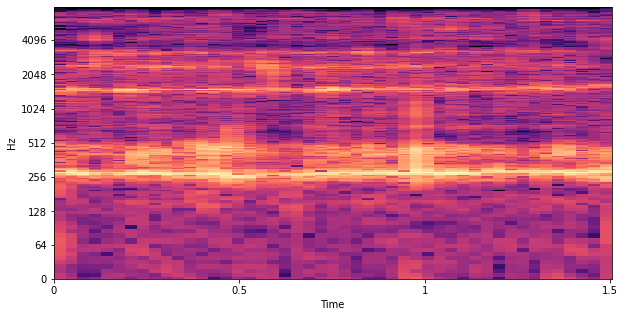

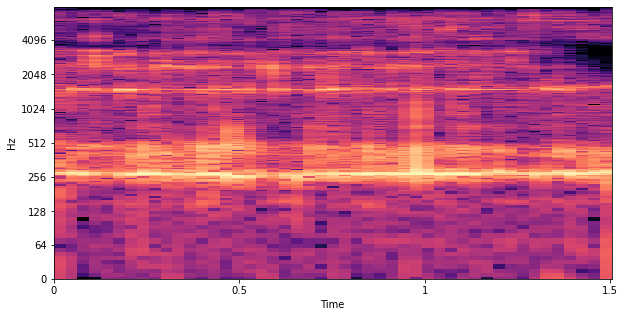

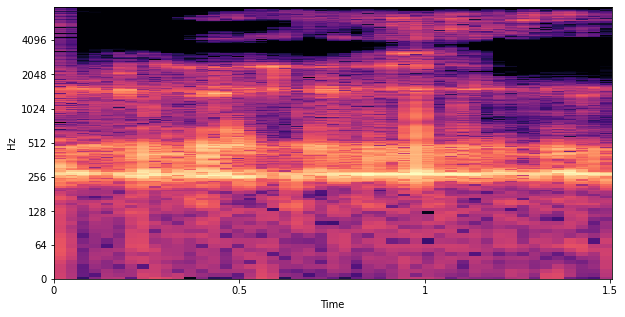

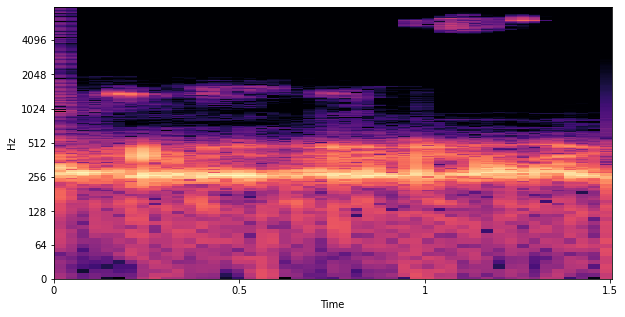

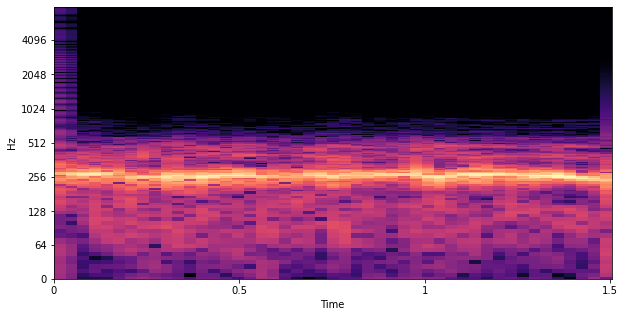

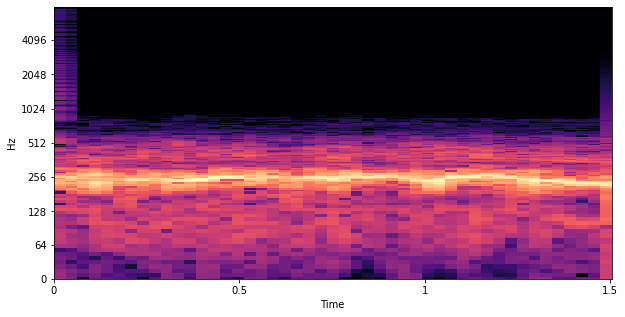

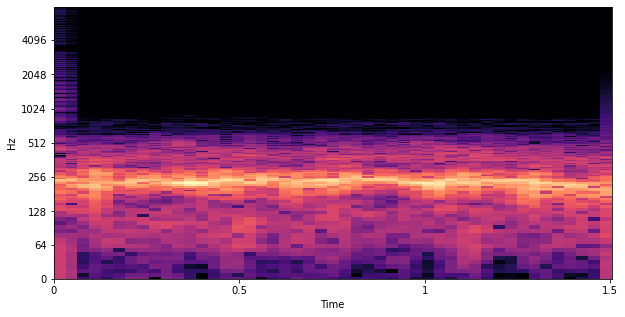

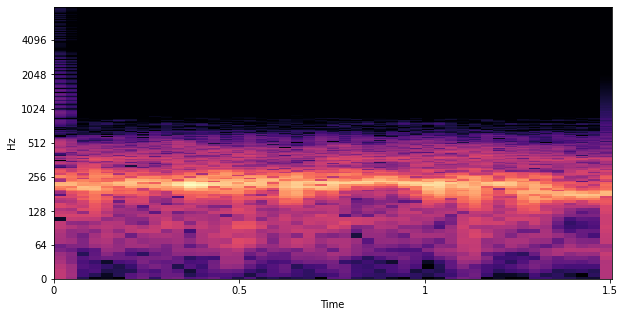

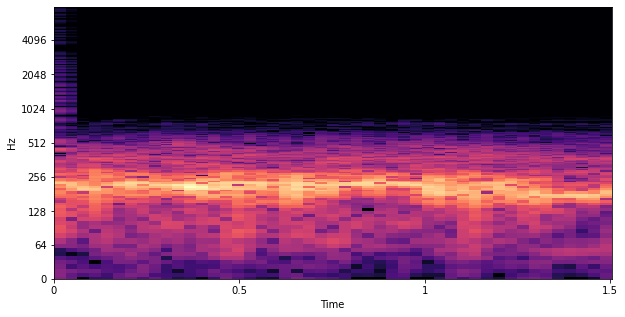

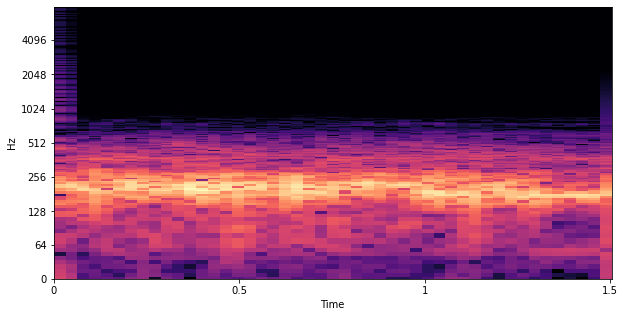

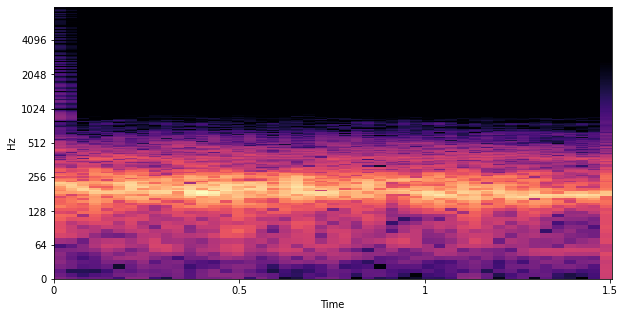

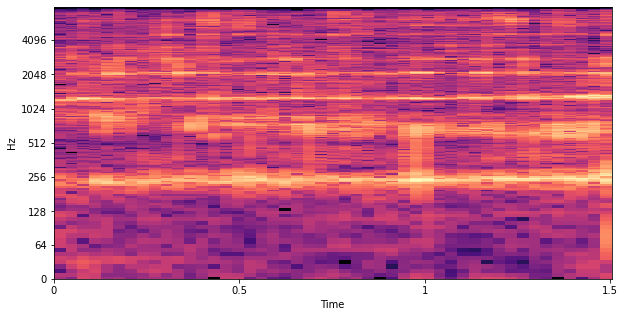

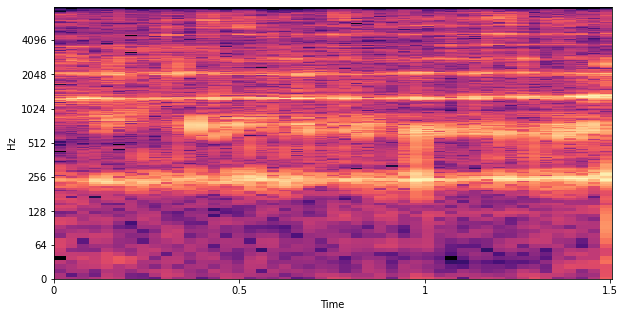

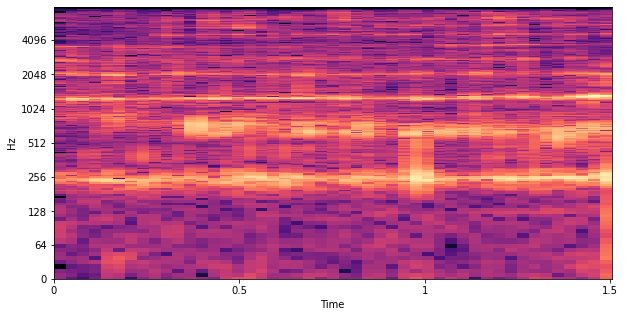

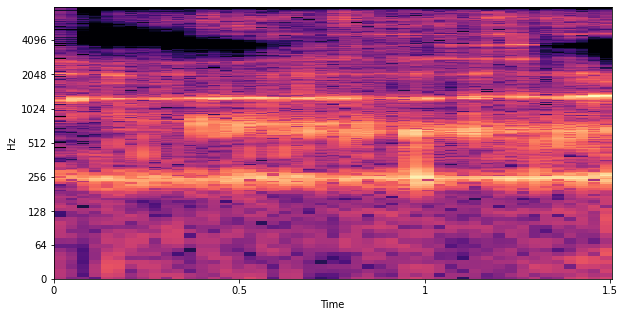

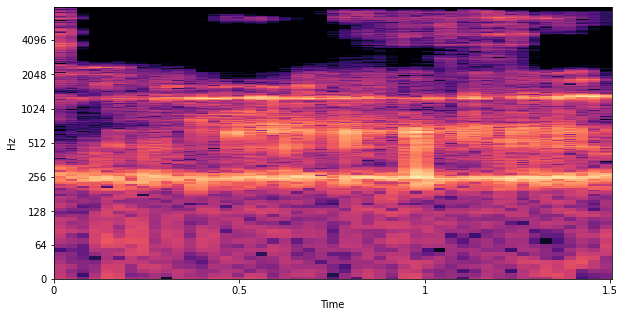

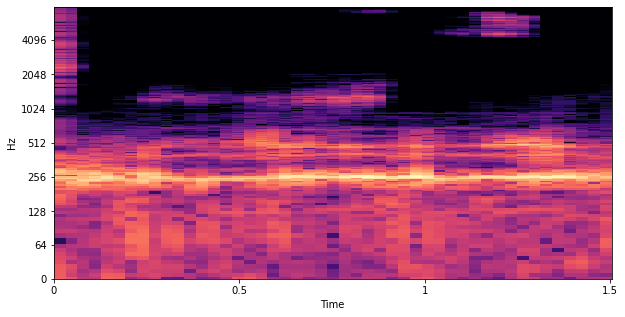

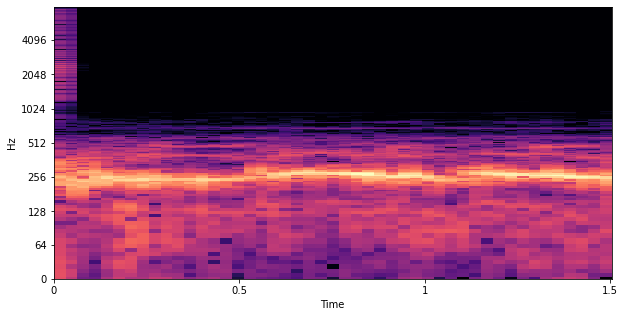

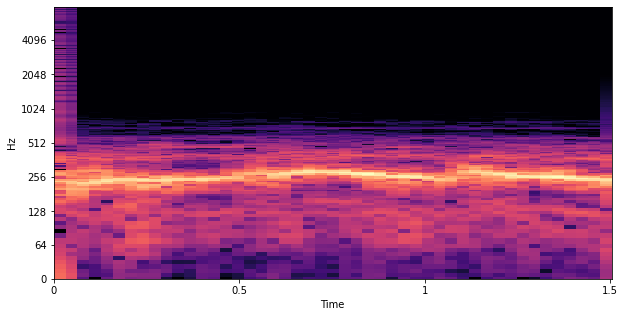

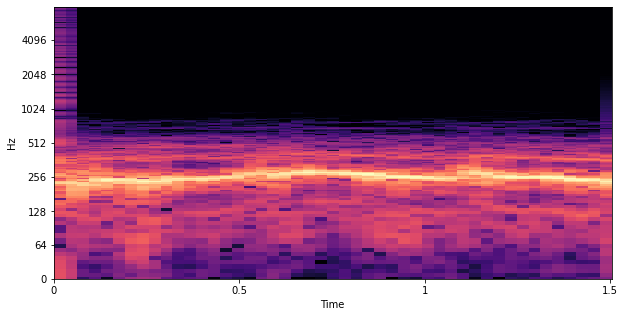

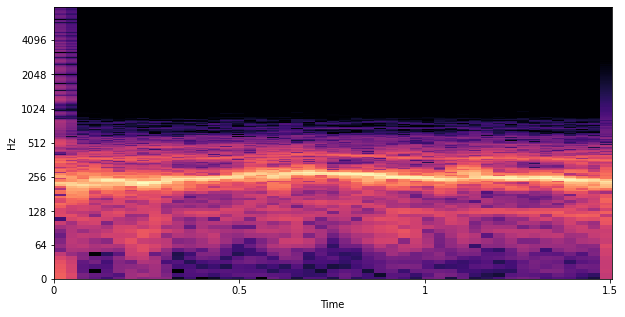

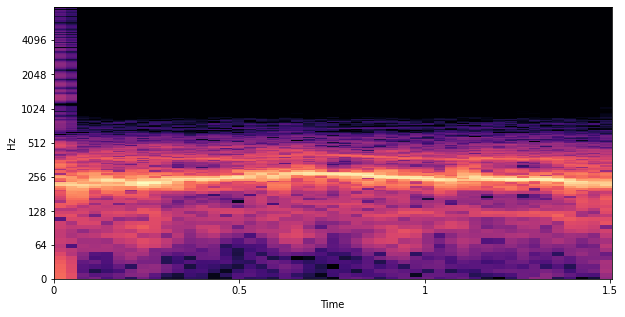

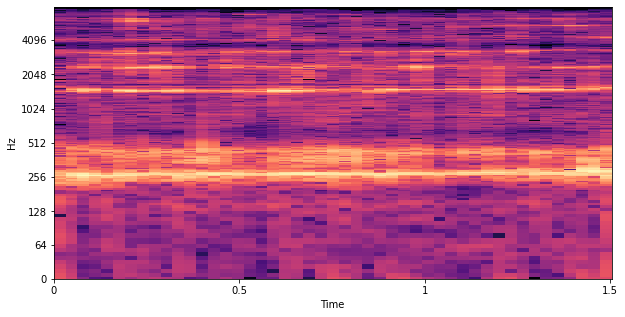

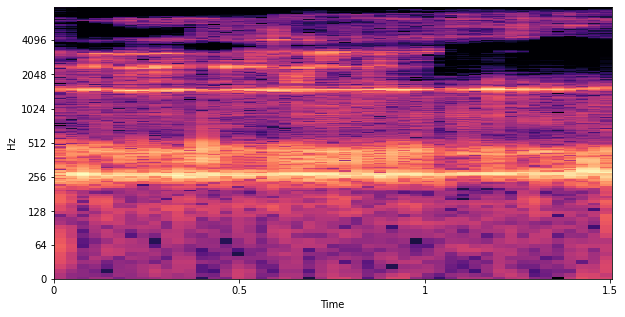

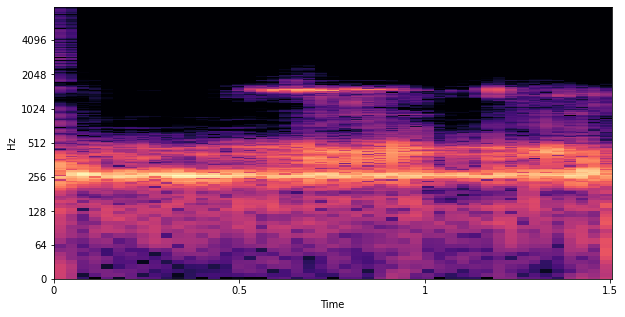

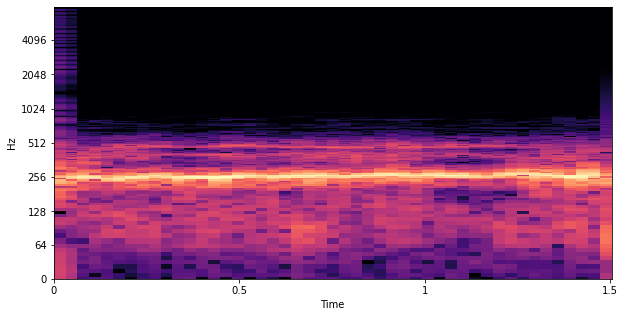

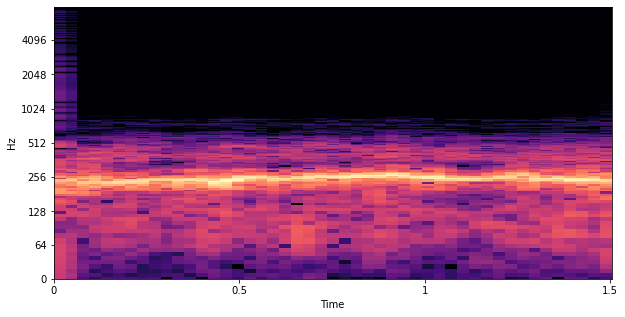

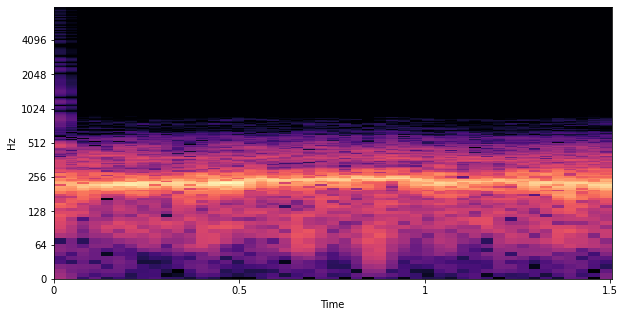

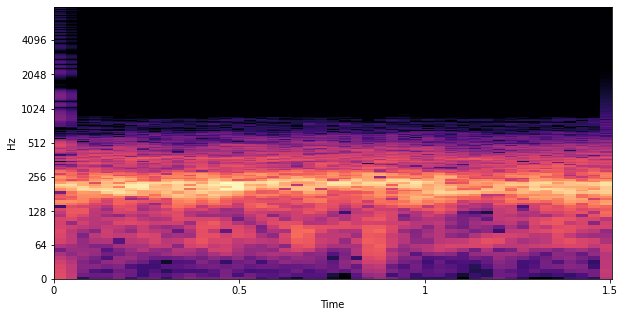

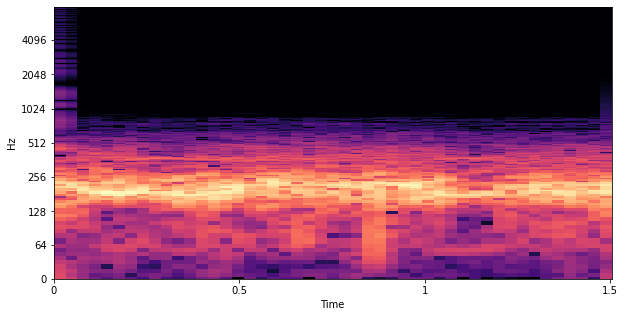

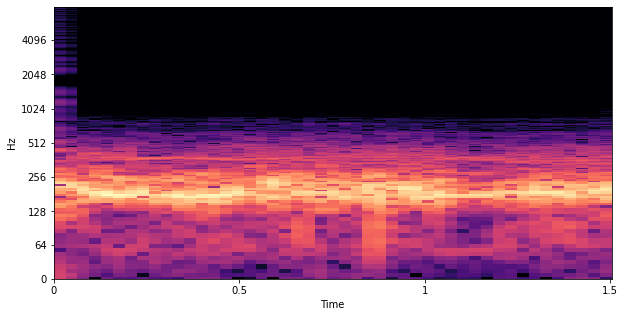

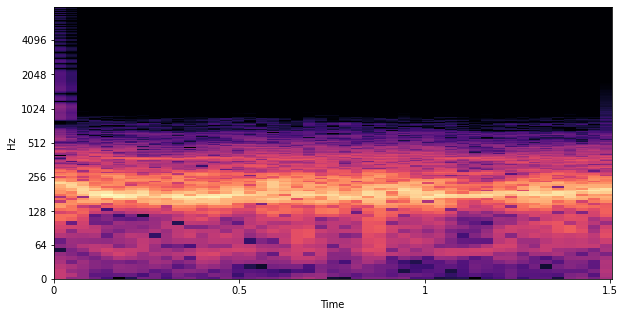

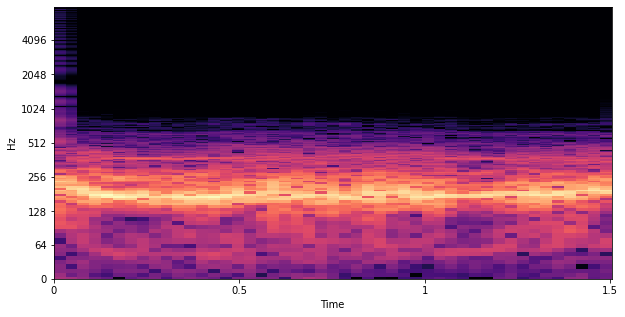

In [164]:
#MorphGAN
selected_folders = ['2022-09-02 13:02', '2022-09-02 13:05', '2022-09-02 13:03', '2022-09-02 13:10', '2022-09-02 13:11', '2022-09-02 13:06', '2022-09-02 13:08', '2022-09-02 13:07', '2022-09-02 13:13', '2022-09-02 13:12']
dest = 'resources/morphgan/'

create_images(morphgan_audio, dest, selected_folders[:3])
morphgan_html = create_html_content('morphgan', dest)

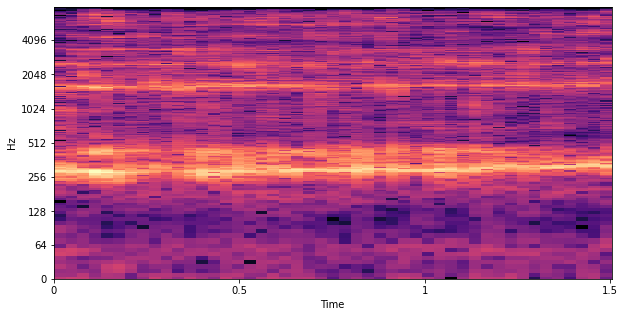

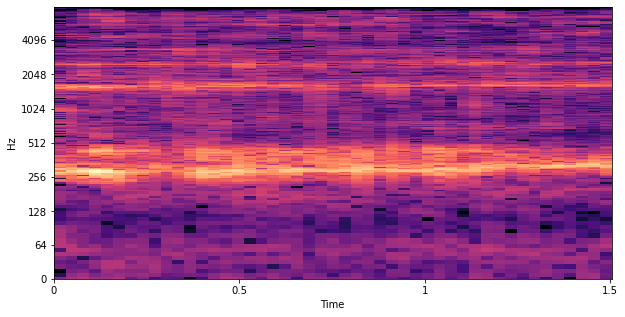

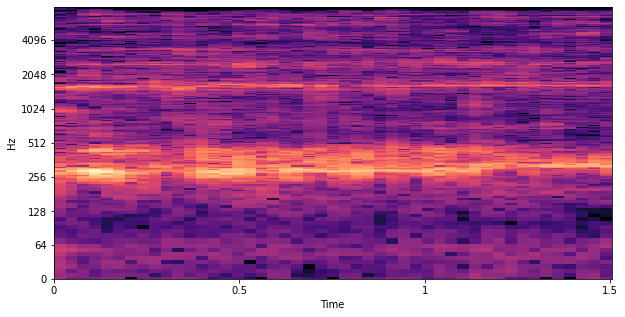

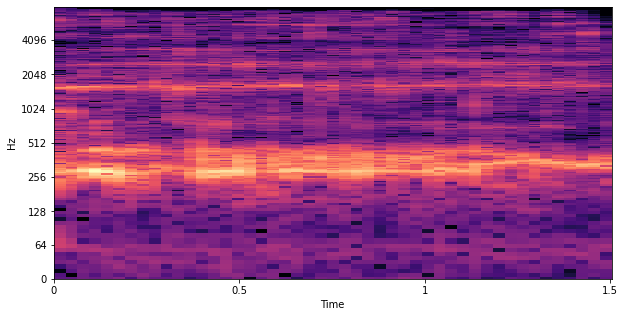

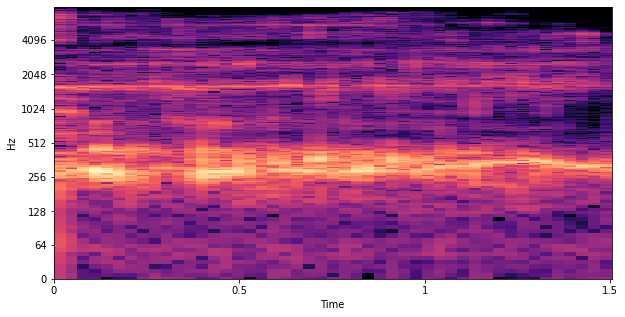

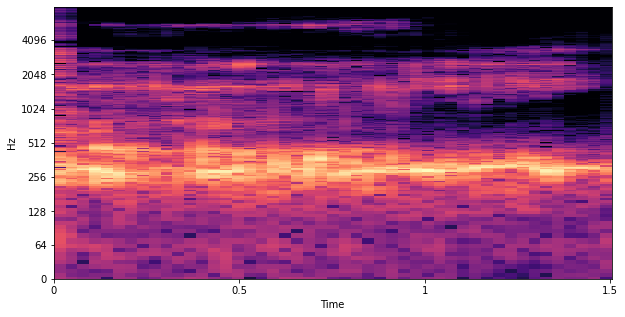

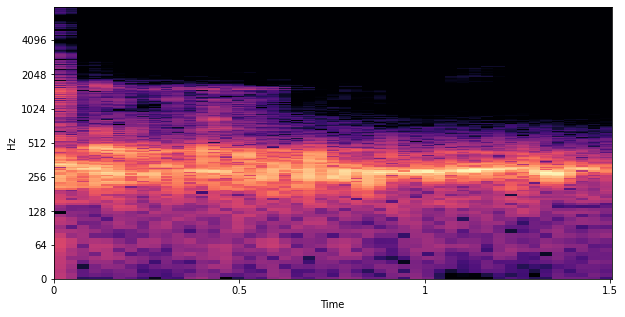

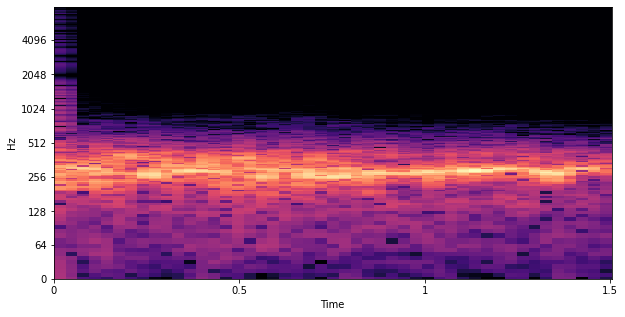

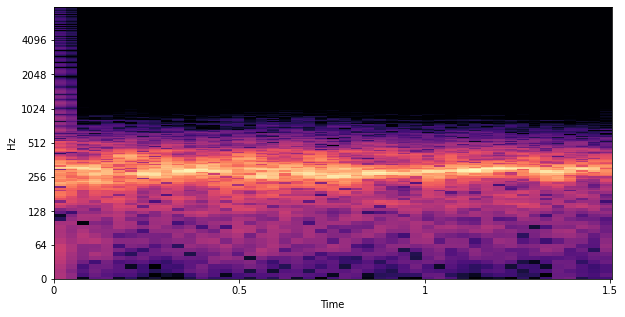

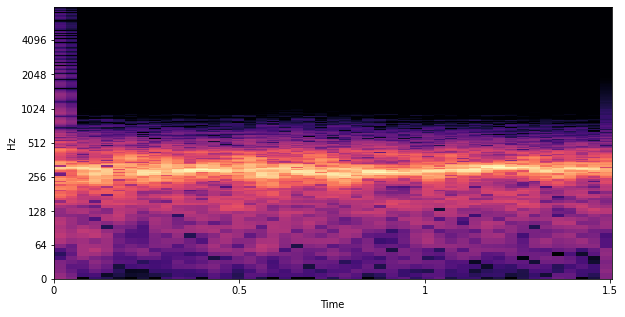

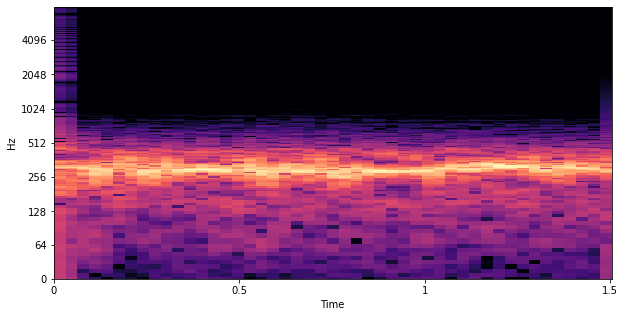

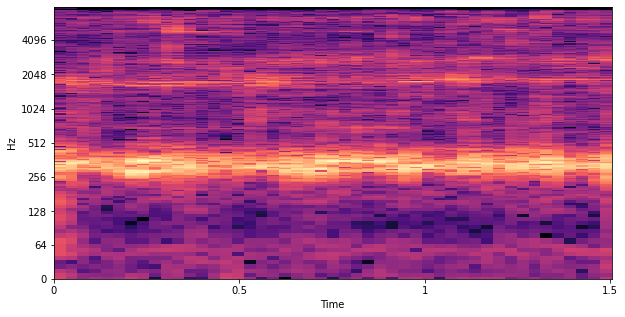

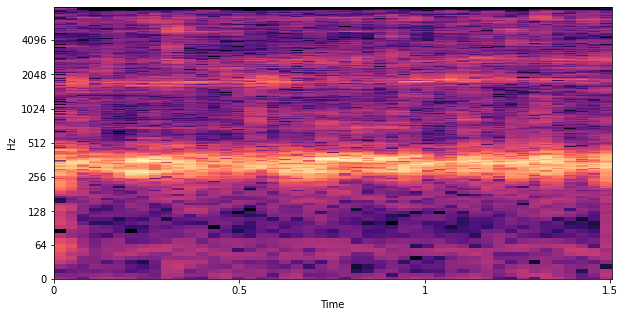

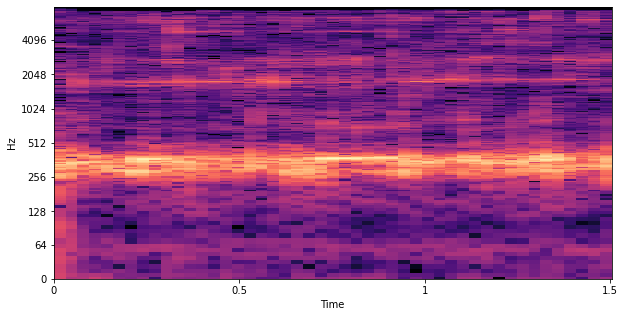

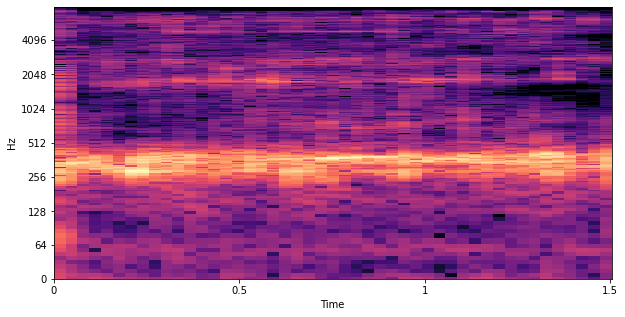

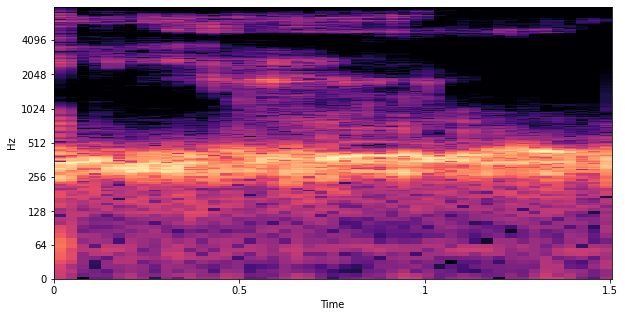

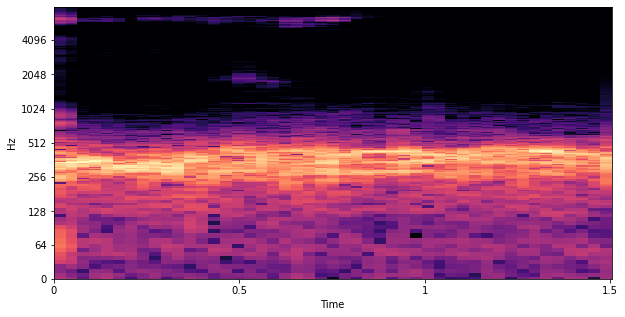

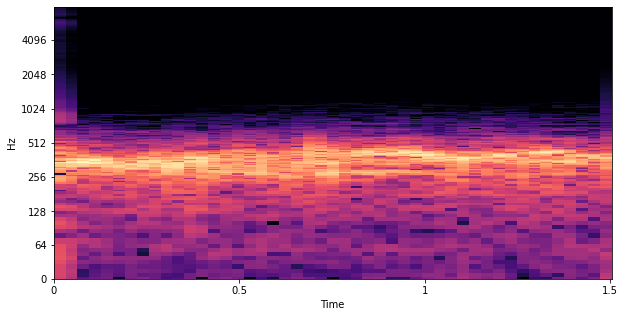

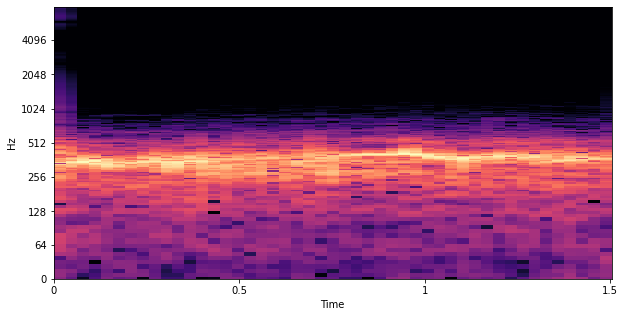

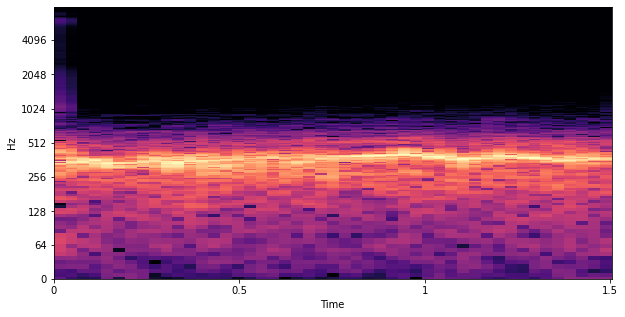

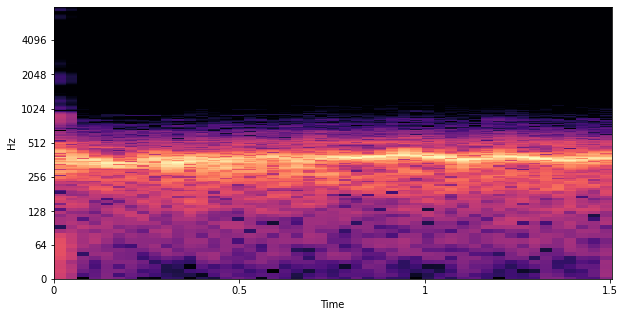

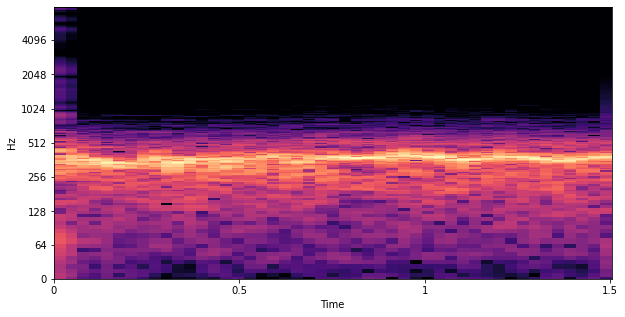

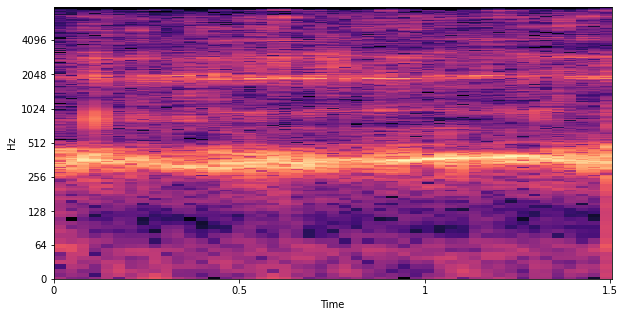

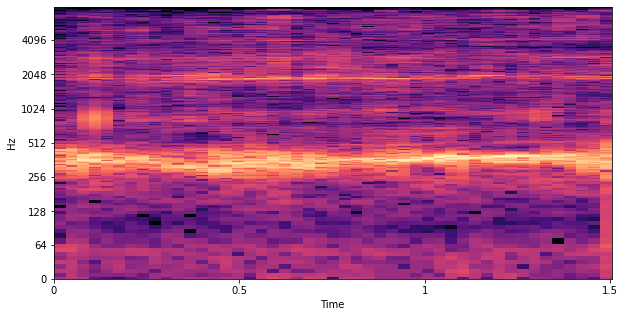

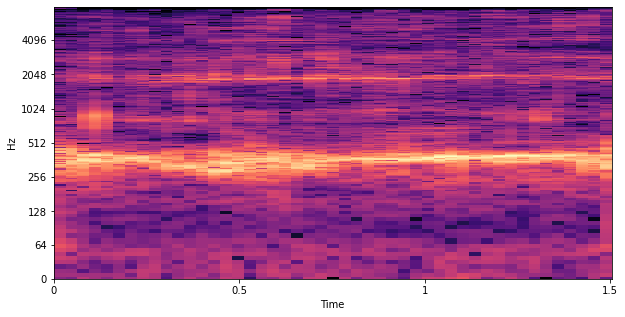

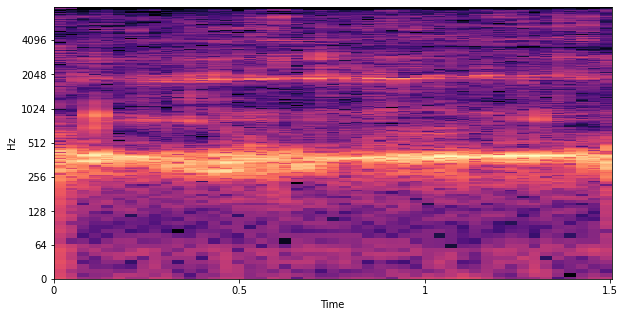

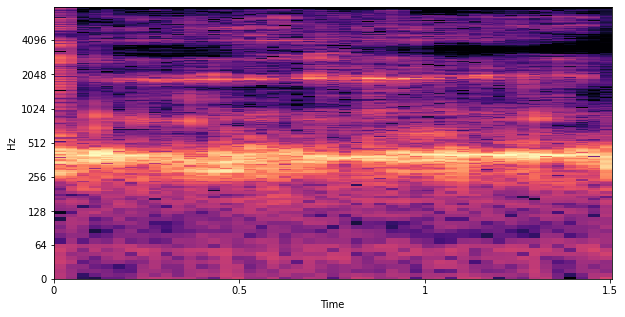

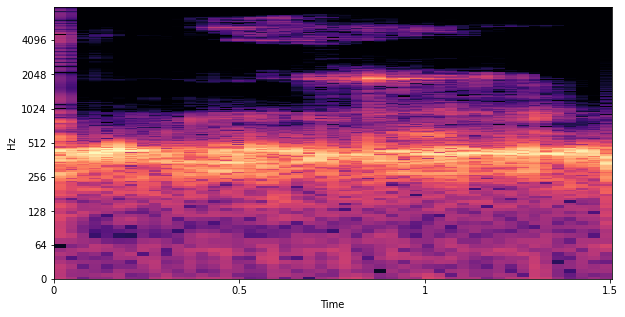

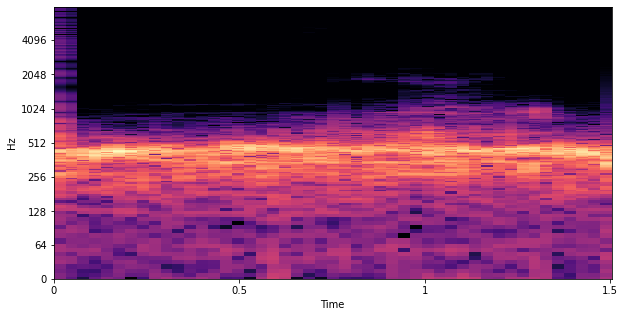

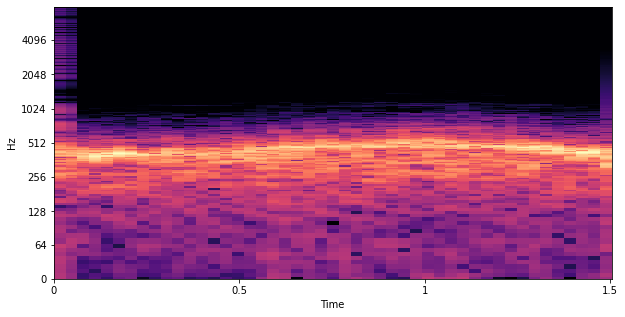

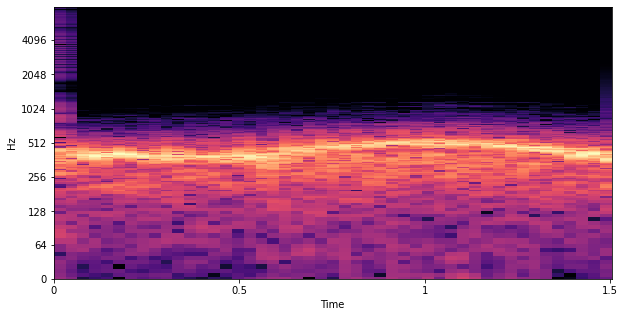

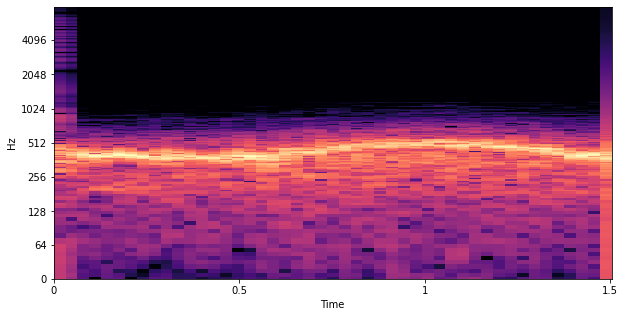

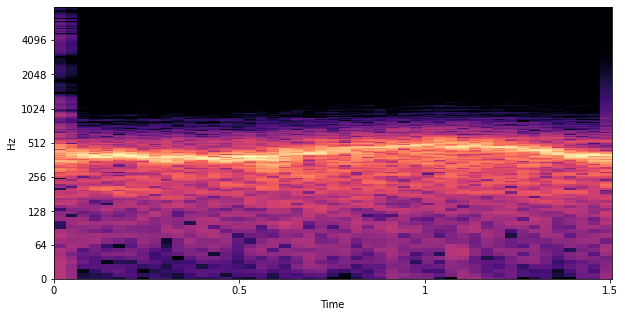

In [165]:
#One Hot
selected_folders = ['2022-09-02 15:13',
 '2022-09-02 15:14',
 '2022-09-02 15:15',
 '2022-09-02 15:12',
 '2022-09-02 15:09',
 '2022-09-02 15:19',
 '2022-09-02 15:21',
 '2022-09-02 15:17',
 '2022-09-02 15:10',
 '2022-09-02 15:18']
dest = 'resources/onehot/'

create_images(onehot_audio, dest, selected_folders[:3])
onehot_html = create_html_content('onehot', dest)

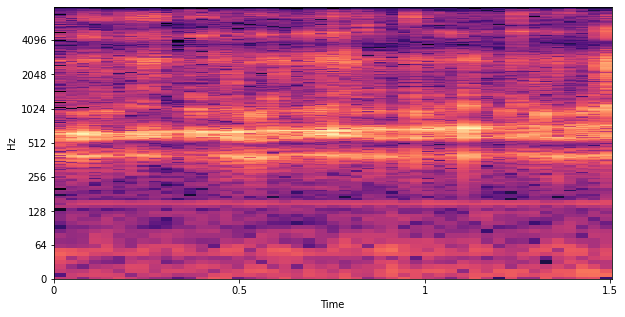

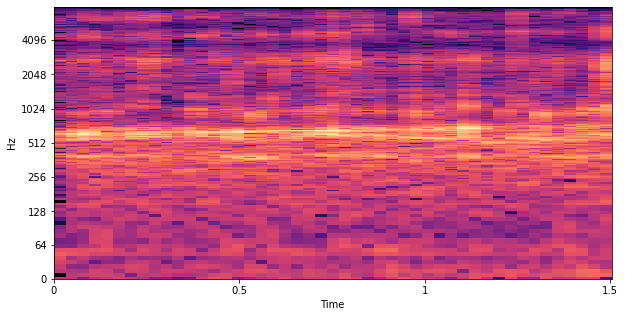

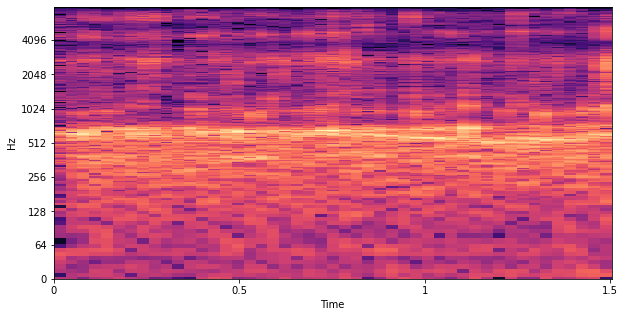

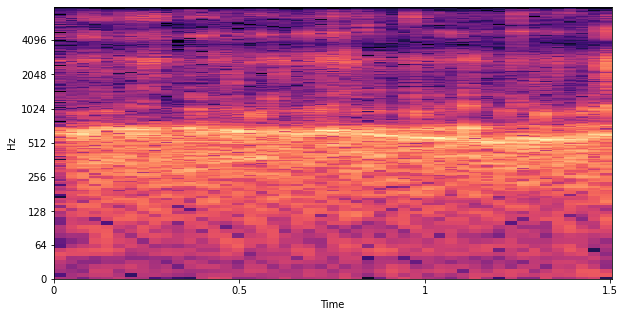

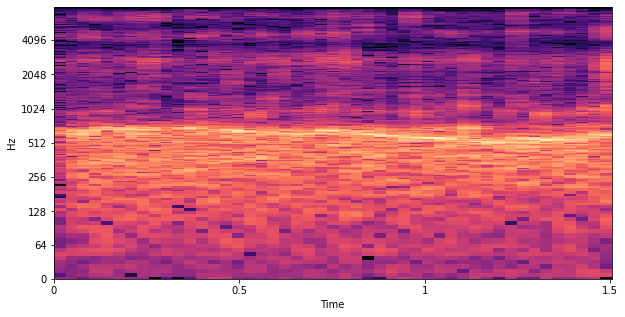

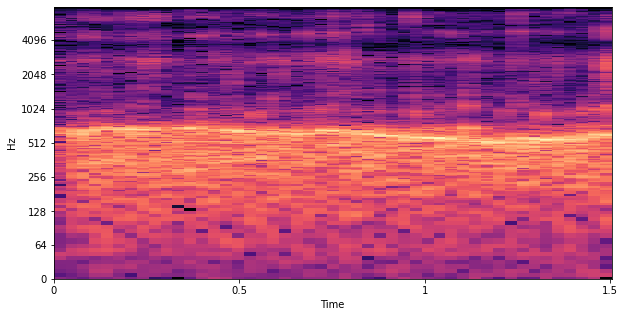

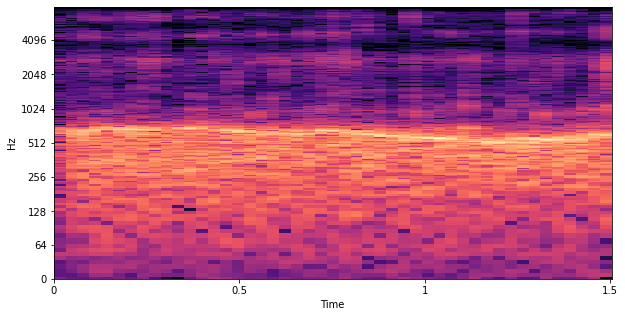

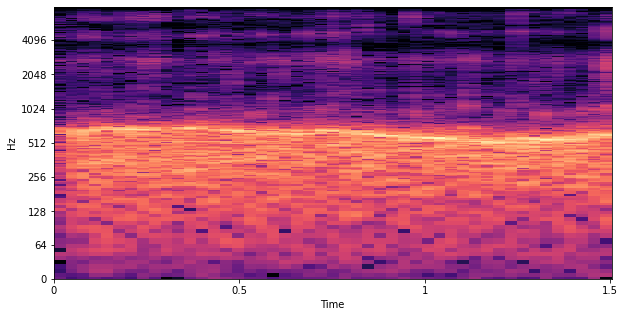

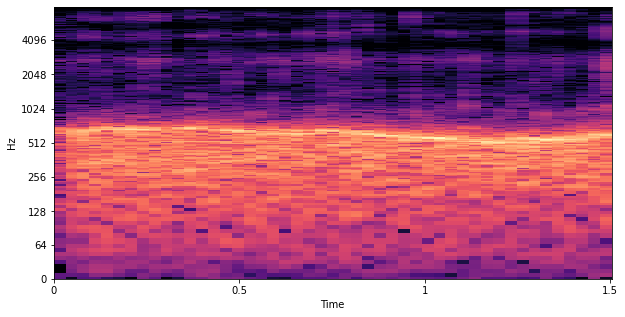

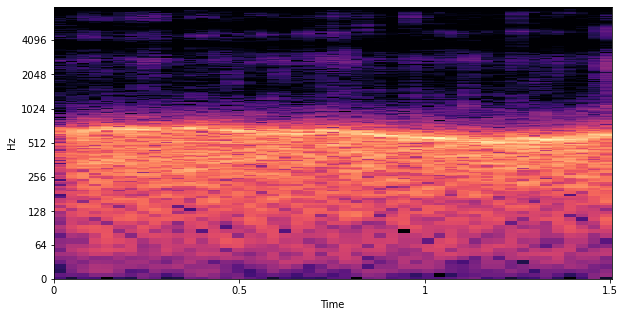

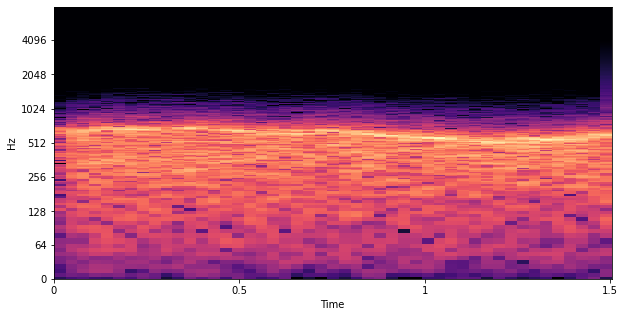

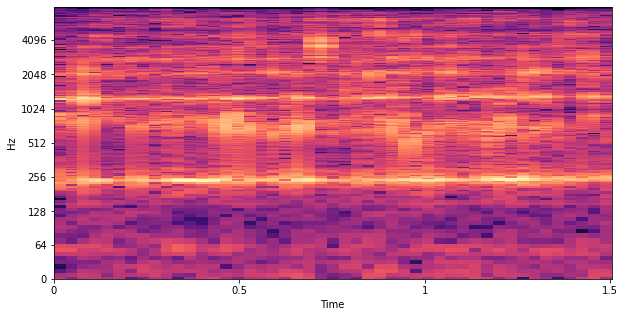

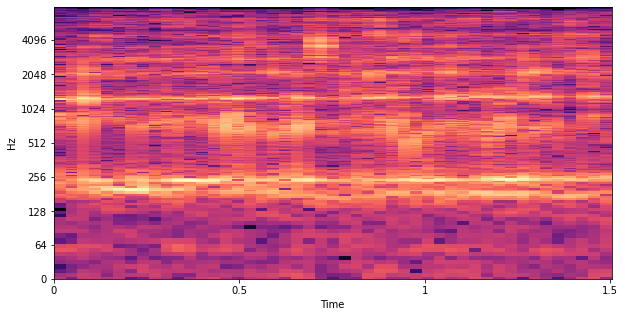

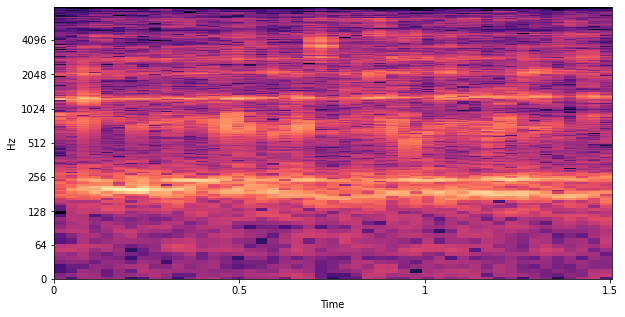

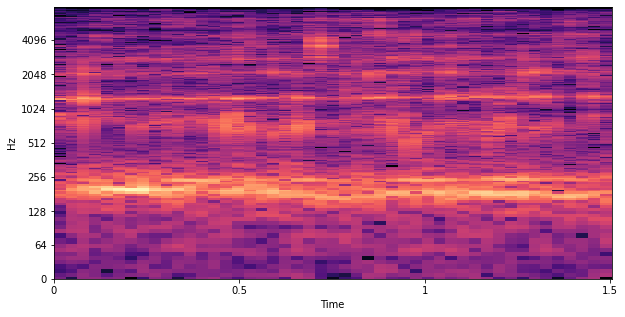

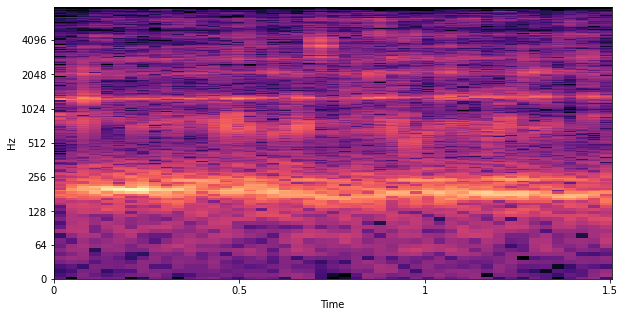

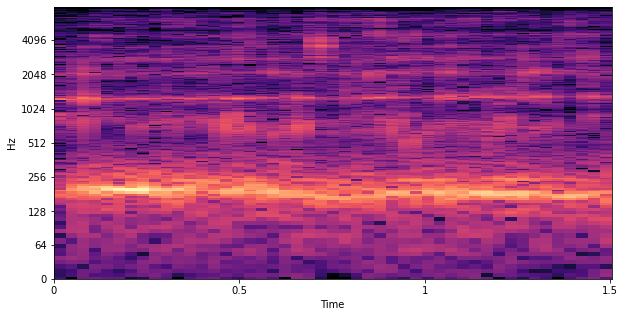

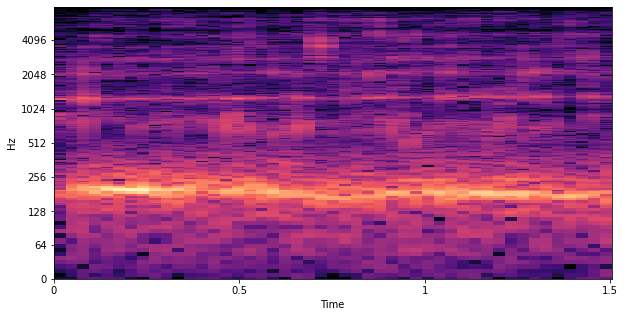

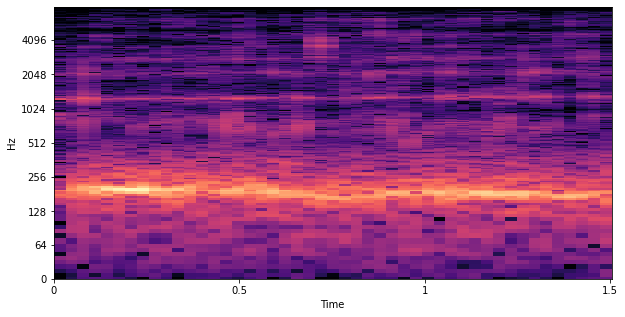

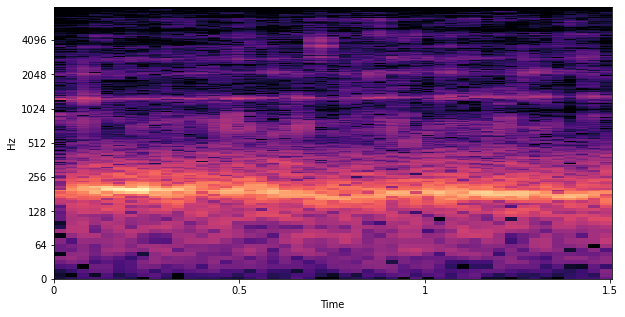

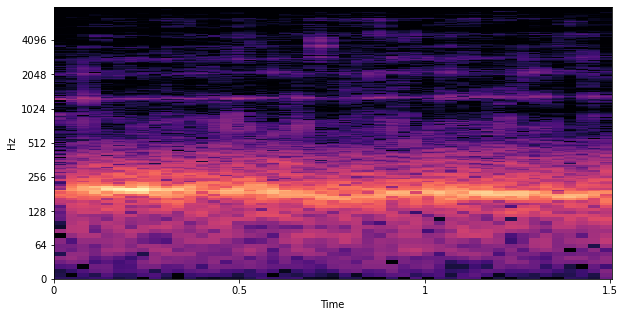

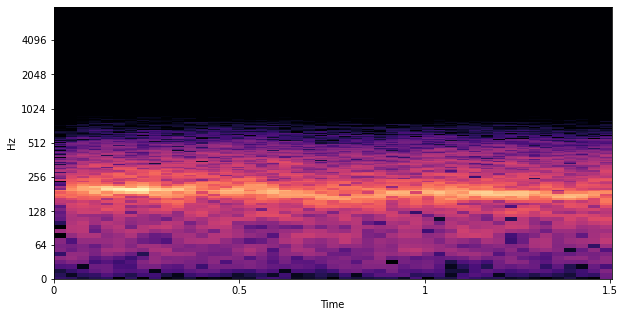

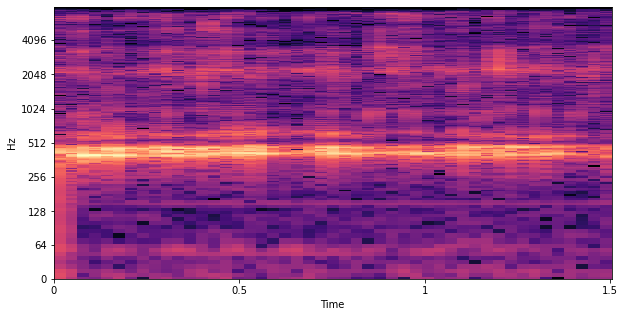

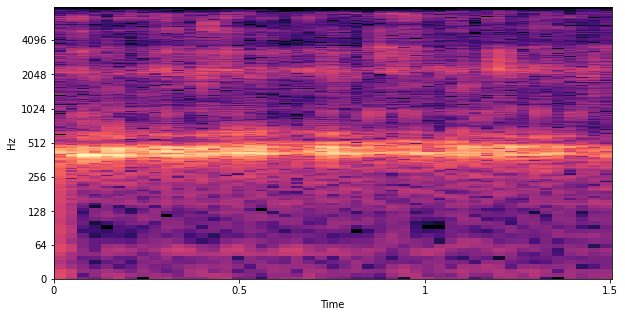

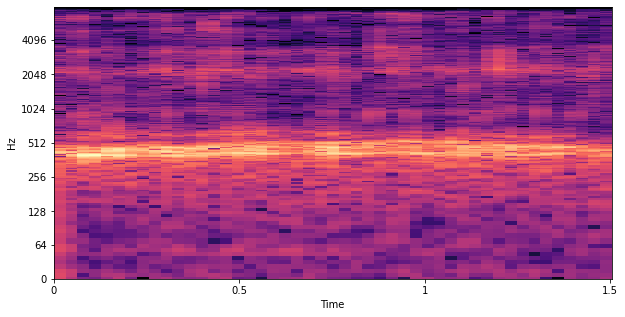

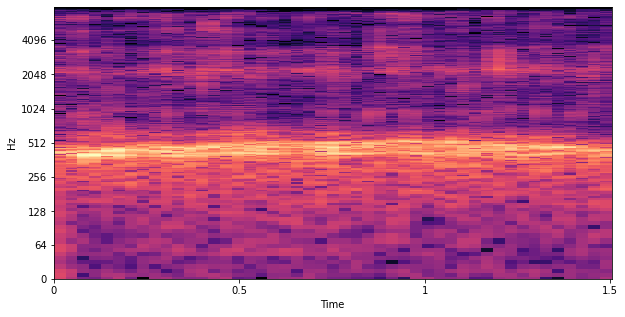

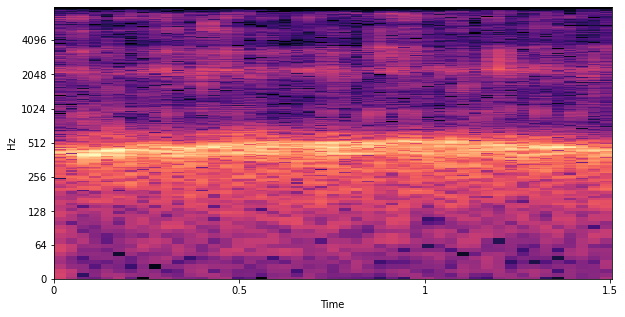

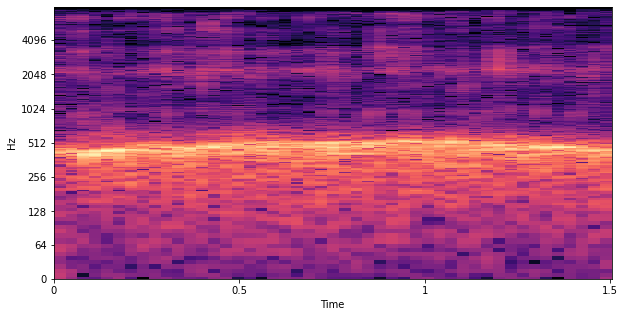

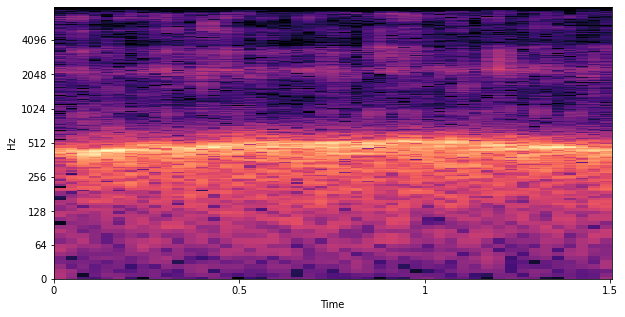

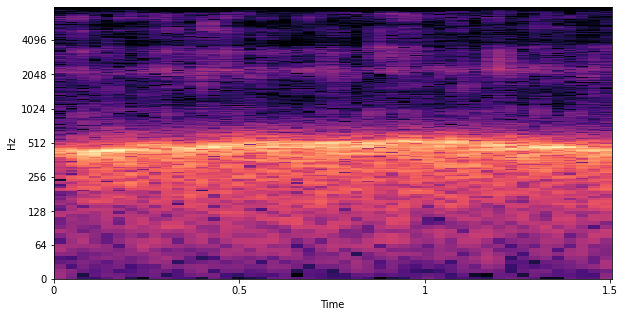

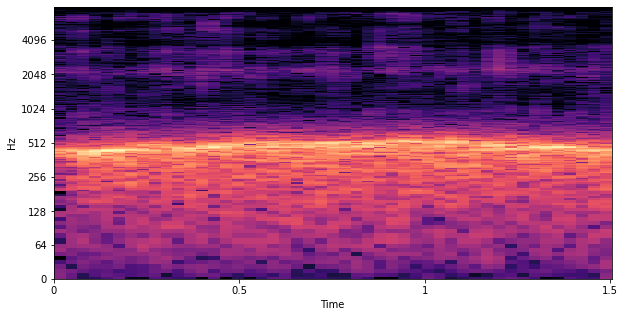

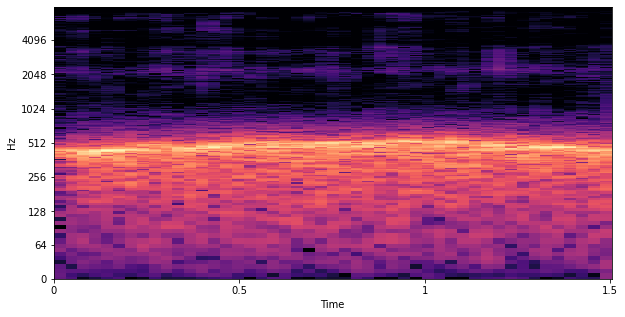

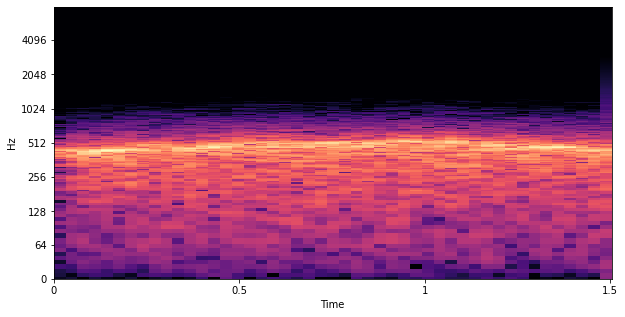

In [166]:
#Mix 

selected_folders = ['9', '0', '7', '6', '1', '10', '8', '4', '3', '2', '5']
dest = 'resources/mix/'

create_images(mix_audio, dest, selected_folders[:3], is_gan=False)
mix_html = create_html_content('mix', dest)

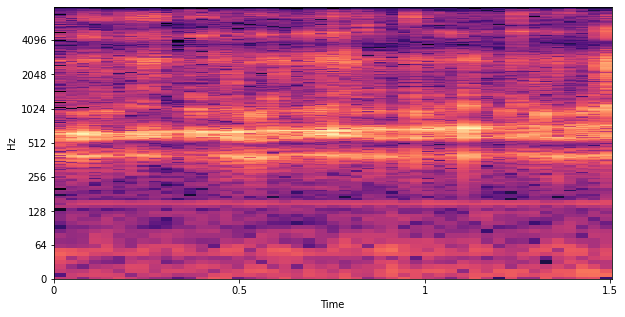

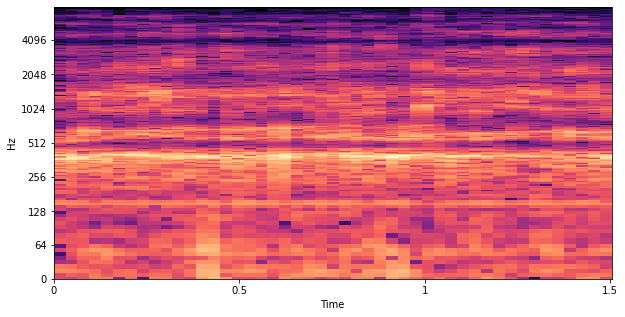

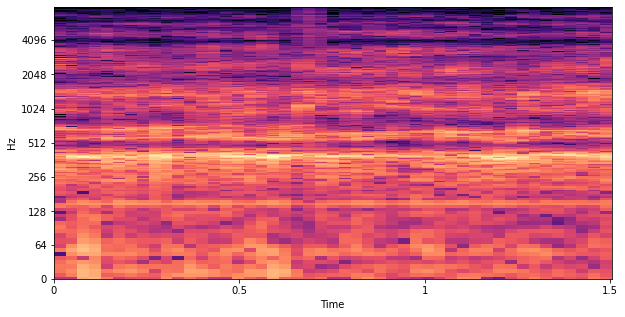

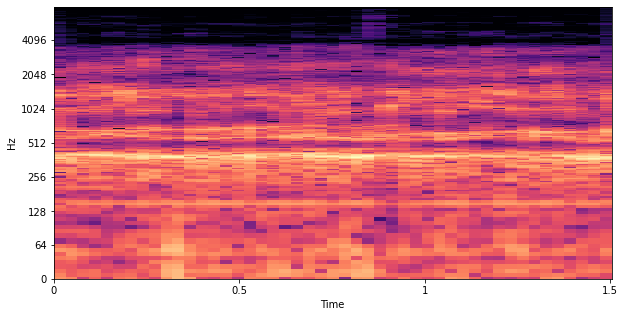

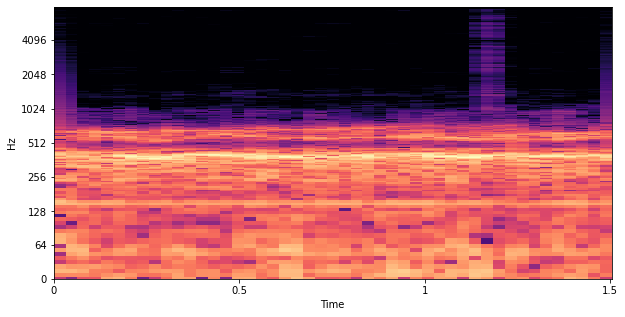

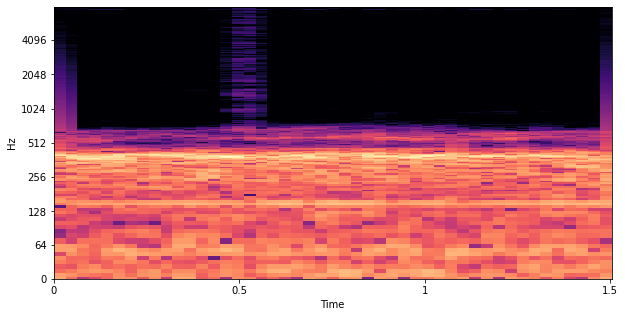

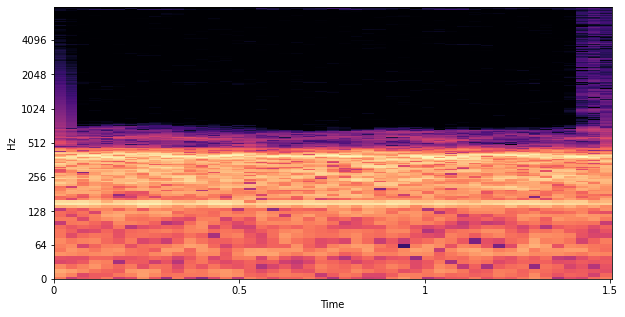

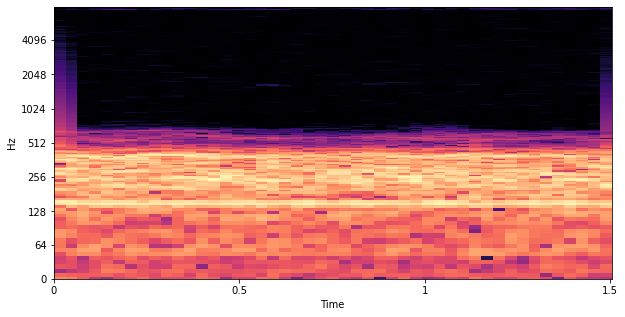

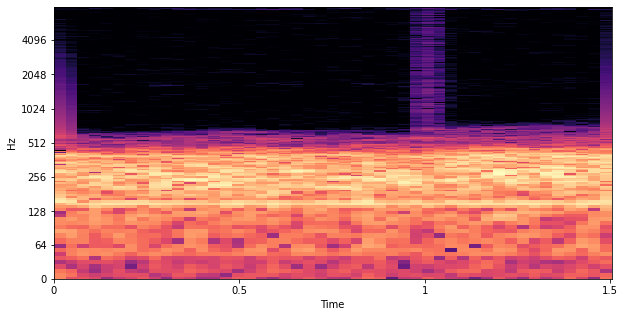

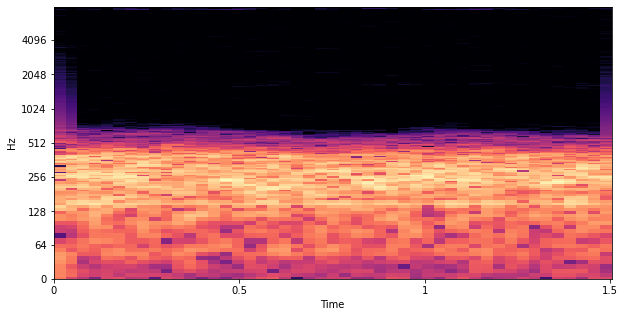

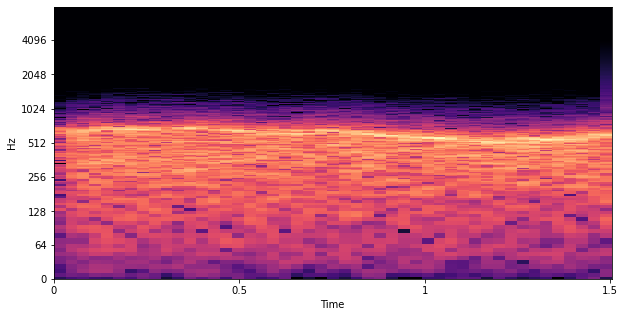

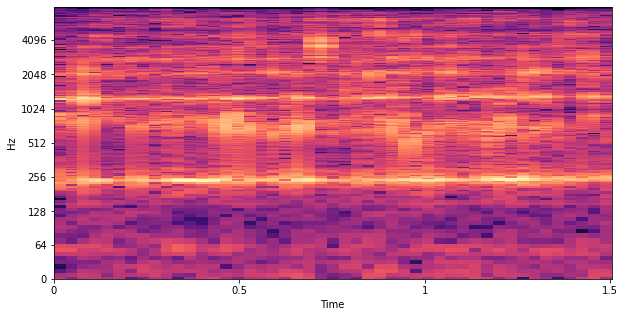

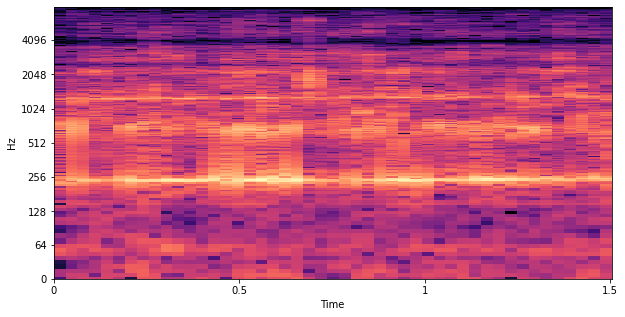

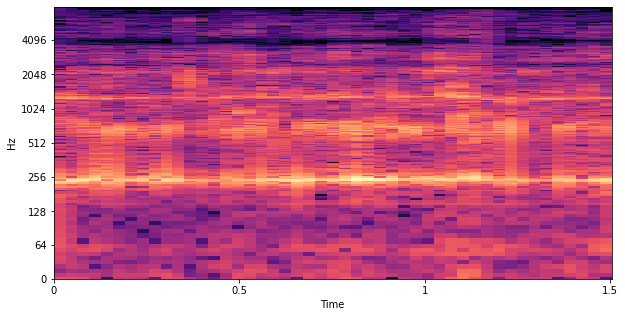

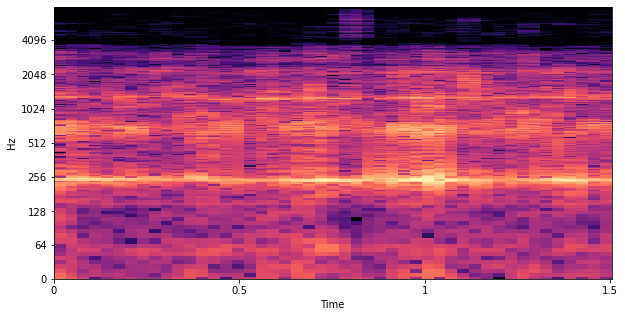

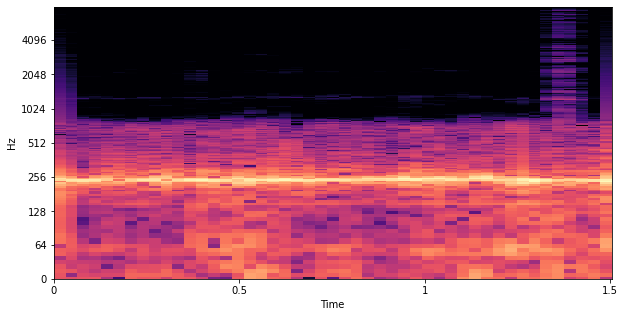

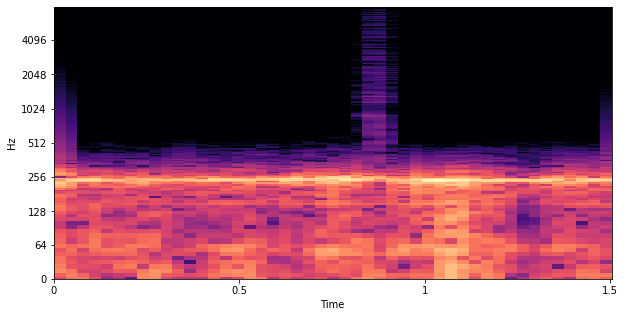

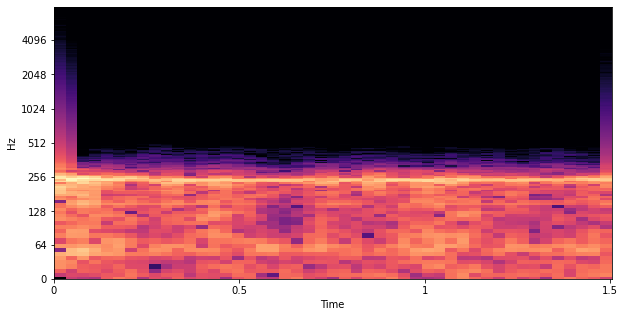

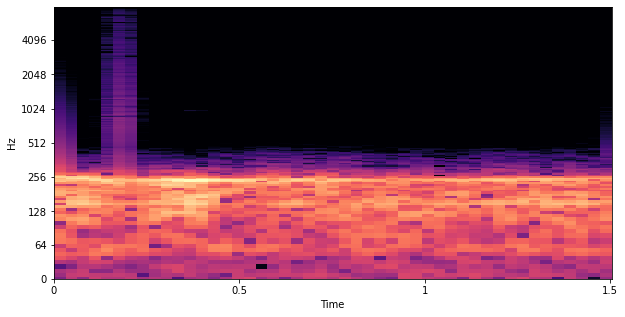

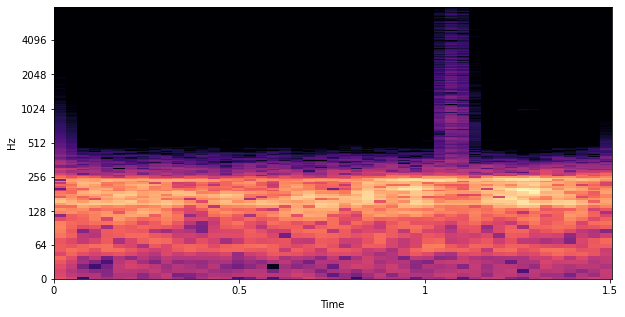

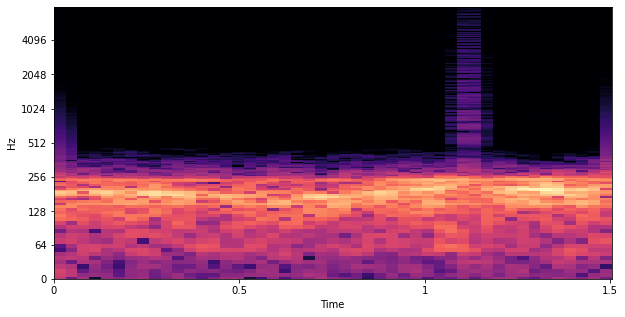

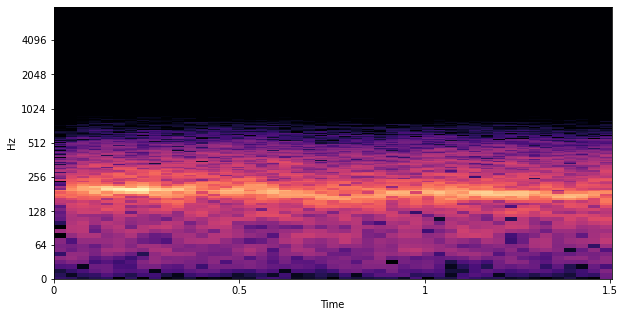

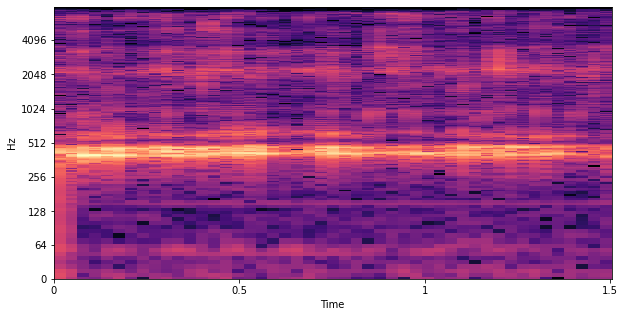

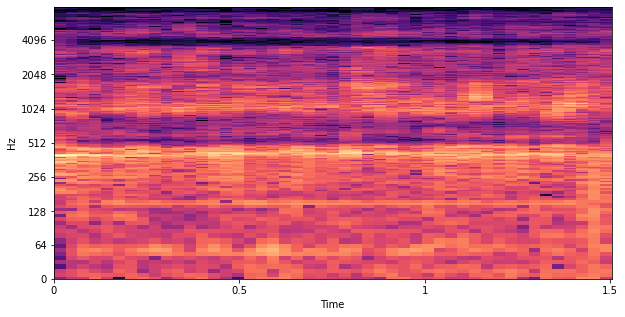

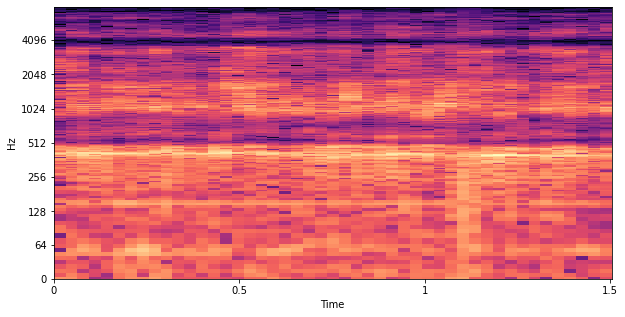

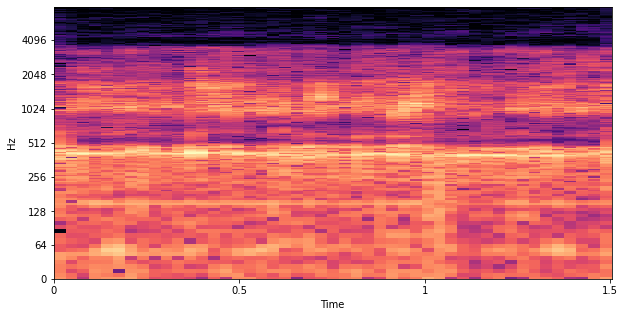

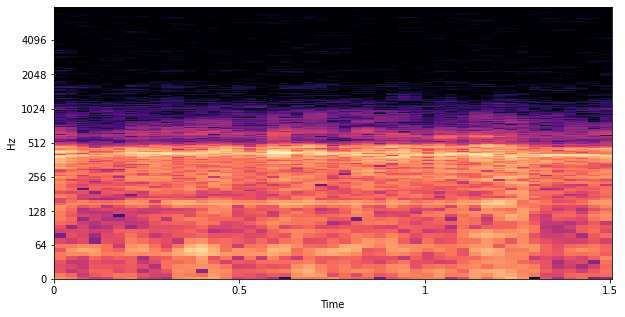

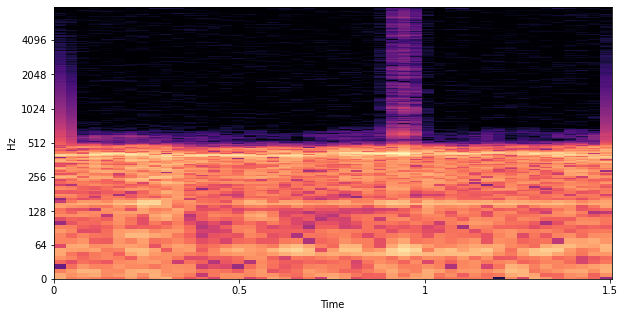

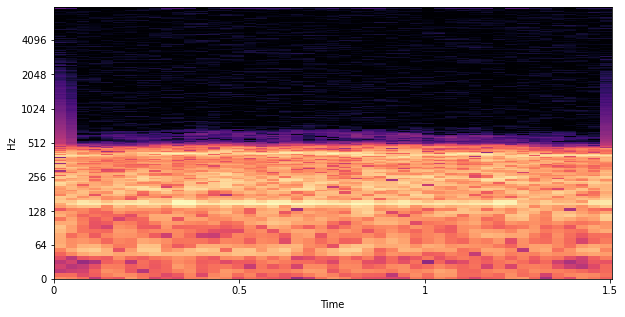

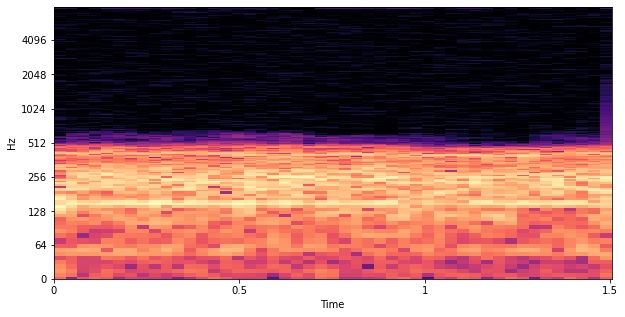

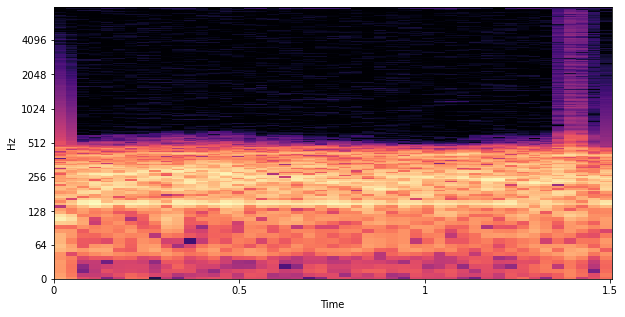

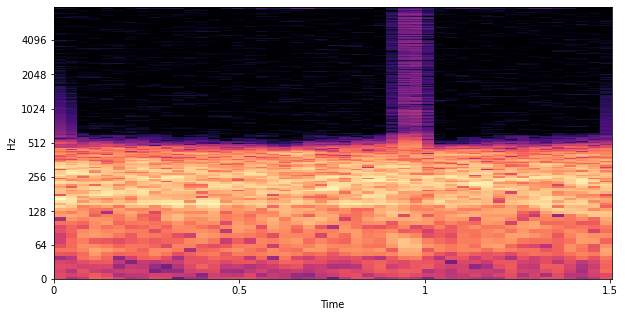

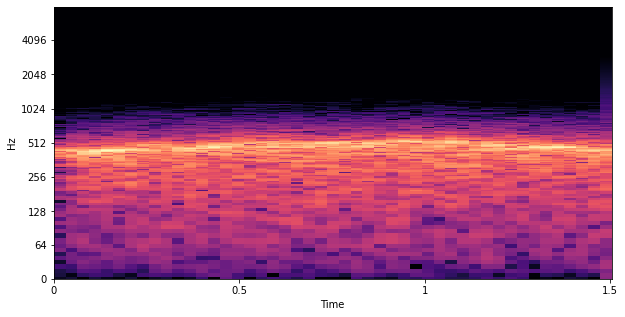

In [167]:
#Morph2 

selected_folders = ['9', '0', '7', '6', '1', '10', '8', '4', '3', '2', '5']
dest = 'resources/morph2/'

create_images(morph2_audio, dest, selected_folders[:3], is_gan=False)
morph2_html = create_html_content('morph2', dest)

In [168]:
style="<style>\
body {\
font-family: 'Open Sans', sans-serif;\
width: 100%;\
/* font-family: 'Montserrat', Arial, Helvetica, sans-serif; */\
}\
\
audio {\
width: 100%;\
}\
\
.pipe-content {\
border-right: solid lightgray 2px;\
}\
\
.bg-topbar {\
background-color: floralwhite;\
}\
\
.sub-headings {\
/* text-decoration: underline #0D6EFD; */\
font-weight: bold;\
}\
\
.example-headings {\
font-weight: bold;\
}\
\
.table-center-align {\
text-align: center;\
}\
\
.dashed-boder {\
border-bottom: solid lightgray 2px;\
border-style: dashed;\
border-top: none;\
border-left: none;\
border-right: none;\
}\
\
.reduced-img-size {\
width: 60%;\
}\
\
.label-large {\
font-size: larger;\
font-weight: 600;\
/* text-decoration: underline; */\
}\
\
.greyout {\
opacity: 0.4;\
filter: alpha(opacity=40);\
/* msie */\
background-color: floralwhite;\
}\
\
.div {\
border: solid black 1px;\
}\
</style>"

In [174]:
overall_html = "\
<html>\
<head>\
<meta http-equiv='Content-Type' content='text/html; charset=UTF-8'>\
<meta charset='utf-8'>\
<meta name='viewport' content='width=device-width, initial-scale=1, shrink-to-fit=yes'>\
<link rel='preconnect' href='https://fonts.gstatic.com'>\
<link\
    href='https://fonts.googleapis.com/css2?family=Open+Sans:ital,wght@0,300;0,400;0,600;0,700;0,800;1,300;1,400;1,600;1,700;1,800&display=swap'\
    rel='stylesheet'>\
<link href='https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta2/dist/css/bootstrap.min.css' rel='stylesheet'\
    integrity='sha384-BmbxuPwQa2lc/FVzBcNJ7UAyJxM6wuqIj61tLrc4wSX0szH/Ev+nYRRuWlolflfl' crossorigin='anonymous'>\
{style}\
</head>\
<body>\
<nav class='navbar navbar-expand-lg navbar-light bg-topbar'>\
<br/>\
<br/>\
<br/>\
<div class='container-fluid'>\
\
<div class='row'>&nbsp;</div>\
<div class='row'>\
<div class='col-12 text-center'>\
    <h2><b>Towards Controllable Audio Texture Morphing</b></h2>\
</div>\
</div>\
<div class='row'>&nbsp;</div>\
</div>\
</nav>\
<div class='container-fluid'>\
<div class='row'>\
<div class='col-2'>\
&nbsp;\
</div>\
<div class='col-8'>\
This is a companion webpage for the paper submitted at ICASSP 2023- <a href='#'>'\
Towards Controllable Audio Texture Morphing'</a>\
</div>\
<div class='col-2'>\
&nbsp;\
</div>\
</div>\
<div class='row text-wrap'>&nbsp;</div>\
<!--Morphgan-->\
<div class='row text-wrap'>&nbsp;</div>\
<div class='row text-wrap'>\
<div class='col-12 text-center'><h4><b>Morphing Samples - Morph GAN</b></h4></div>\
</div>\
{morphgan_html}\
<!--Morphgan complete-->\
<div class='row text-wrap'>\
    <div class='col-12 bg-dark'>&nbsp;</div>\
</div>\
<!--One Hot-->\
<div class='row text-wrap'>&nbsp;</div>\
<div class='row text-wrap'>\
<div class='col-12 text-center'><h4><b>Morphing Samples - One Hot GAN</b></h4></div>\
</div>\
{onehot_html}\
<!--One Hot complete-->\
<div class='row text-wrap'>\
    <div class='col-12 bg-dark'>&nbsp;</div>\
</div>\
<!--Mix-->\
<div class='row text-wrap'>&nbsp;</div>\
<div class='row text-wrap'>\
<div class='col-12 text-center'><h4><b>Morphing Samples - Mix</b></h4></div>\
</div>\
{mix_html}\
<!--Mix complete-->\
<div class='row text-wrap'>\
    <div class='col-12 bg-dark'>&nbsp;</div>\
</div>\
<!--Morph2-->\
<div class='row text-wrap'>&nbsp;</div>\
<div class='row text-wrap'>\
<div class='col-12 text-center'><h4><b>Morphing Samples - Morph2</b></h4></div>\
</div>\
{morph2_html}\
<!--Morph2 complete-->\
<div class='row text-wrap'>\
    <div class='col-12 bg-dark'>&nbsp;</div>\
</div>\
</div>\
</body>\
</html>"

overall_html = overall_html.format(morphgan_html=morphgan_html,onehot_html=onehot_html, mix_html=mix_html, 
                                   morph2_html=morph2_html,style=style)
print(overall_html)

<html><head><meta http-equiv='Content-Type' content='text/html; charset=UTF-8'><meta charset='utf-8'><meta name='viewport' content='width=device-width, initial-scale=1, shrink-to-fit=yes'><link rel='preconnect' href='https://fonts.gstatic.com'><link    href='https://fonts.googleapis.com/css2?family=Open+Sans:ital,wght@0,300;0,400;0,600;0,700;0,800;1,300;1,400;1,600;1,700;1,800&display=swap'    rel='stylesheet'><link href='https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta2/dist/css/bootstrap.min.css' rel='stylesheet'    integrity='sha384-BmbxuPwQa2lc/FVzBcNJ7UAyJxM6wuqIj61tLrc4wSX0szH/Ev+nYRRuWlolflfl' crossorigin='anonymous'><style>body {font-family: 'Open Sans', sans-serif;width: 100%;/* font-family: 'Montserrat', Arial, Helvetica, sans-serif; */}audio {width: 100%;}.pipe-content {border-right: solid lightgray 2px;}.bg-topbar {background-color: floralwhite;}.sub-headings {/* text-decoration: underline #0D6EFD; */font-weight: bold;}.example-headings {font-weight: bold;}.table-center-al

# Semantic

In [12]:
morphgan_audio='/Users/purnimakamath/appdir/Github/ieee-tx-on-mm/data/water-wind/morphgan/audio/semantic'
morphgan_audio_water_dirs = ['2022-08-24 21:38','2022-08-24 21:39','2022-08-24 21:40','2022-08-24 21:41','2022-08-24 21:42']
morphgan_audio_wind_dirs = ['2022-08-24 21:44','2022-08-24 21:45','2022-08-24 21:46','2022-08-24 21:47','2022-08-24 21:48']

onehot_audio='/Users/purnimakamath/appdir/Github/ieee-tx-on-mm/data/water-wind/onehot/audio/semantic'
onehot_audio_water_dirs = ['2022-08-24 22:31','2022-08-24 22:33','2022-08-24 22:34','2022-08-24 22:35','2022-08-24 22:36']
onehot_audio_wind_dirs = ['2022-08-24 22:26','2022-08-24 22:27','2022-08-24 22:28','2022-08-24 2221:29','2022-08-24 22:30']


mix_audio='/Users/purnimakamath/appdir/Github/ieee-tx-on-mm/data/water-wind/mix/audio/semantic'
mix_audio_water_dirs = ['0','1','2','3','4','5']
mix_audio_wind_dirs = ['6','7','8','9','10','11']


morph2_audio='/Users/purnimakamath/appdir/Github/ieee-tx-on-mm/data/water-wind/morph2/audio/semantic'
morph2_audio_water_dirs = ['0','1','2','3','4','5']
morph2_audio_wind_dirs = ['6','7','8','9','10','11']


In [63]:
y, sr = librosa.load(os.path.join(morphgan_audio,morphgan_audio_water_dirs[0],
                                  'one_z_pitch_sweep','test_pitch_sweep_0.wav'), sr=16000)
y=y[:int(1.5*16000)]
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/purnimakamath/appdir/Github/ieee-tx-on-mm/data/water-wind/morphgan/audio/morph/2022-08-24 21:38/one_z_pitch_sweep/test_pitch_sweep_0.wav'

In [64]:
y, sr = librosa.load(os.path.join(morphgan_audio,morphgan_audio_water_dirs[0],
                                  'one_z_pitch_sweep','test_pitch_sweep_10.wav'), sr=16000)
y=y[:int(1.5*16000)]
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax)
ax.set(title='Linear-frequency power spectrogram')
ax.label_outer()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/purnimakamath/appdir/Github/ieee-tx-on-mm/data/water-wind/morphgan/audio/morph/2022-08-24 21:38/one_z_pitch_sweep/test_pitch_sweep_10.wav'